## Silver data analysis

Based on the data for the refractive index for silver obtained from [Johnson and Christy, 1972](http://fisica.ufpr.br/jfreire/EstadoSolido/optical%20contstants%20of%20noble%20metals.pdf) we dicide to dig deeper on the option for interpolation. 

* Data interpolation decision
* Experimental data analysis 

### Data interpolation desicion

We try linear and a spline interpolation. We use the module `scipy.interpolate` in particular [`interp1d`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.interp1d.html) for the linear interpolation and, [`splrep`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html) and [`splev`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html) for the splines .

In [1]:
import numpy 
from matplotlib import pyplot
%matplotlib notebook

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#Importing gold data
#Format: wavelength, refrac_index_real (n), refrac_index_complex (k) 

lambda_s , n_s , k_s = numpy.loadtxt('gold_silver_water_raw-data/silver_JC72.txt', unpack=True)
lambda_s = lambda_s*1e3 #To convert to nm

### Plot of the raw data

In [3]:
def plot_refrac(lamb, n, k):
    
    """
    Plots the trend of the refractive index with the wavelength.
    Plots separately the real and imaginary part of the refractive index.
    
    Arguments:
    ----------
    lamb: array, wavelengths.
    n   : array, real part of refractive index. 
    k   : array, imaginary part of refractive index.
    
    Returns:
    --------
    Plots of refrac_index_real vs lambda, refrac_index_imaginary vs lambda. 
    """
    
    pyplot.figure(figsize=(12,4))  

    pyplot.subplot(121)
    
    pyplot.scatter(lamb,n, color='#2929a3') 
    
    pyplot.xlabel('Wavelength [nm]')
    pyplot.ylabel('Refractive index')
    pyplot.xlim(min(lamb)-5, max(lamb)+5)
    pyplot.xticks(numpy.linspace(min(lamb), max(lamb), 10), rotation=25)
    pyplot.title('Real')
    pyplot.grid()
    
    
    pyplot.subplot(122)
    
    pyplot.scatter(lamb,k, color='#ff5733') 
    
    pyplot.xlabel('Wavelength [nm]')
    #pyplot.ylabel('Refractive index')
    pyplot.xlim(min(lamb)-5, max(lamb)+5)
    pyplot.xticks(numpy.linspace(min(lamb), max(lamb), 10), rotation=25)
    pyplot.title('Imaginary')
    pyplot.grid()

<IPython.core.display.Javascript object>


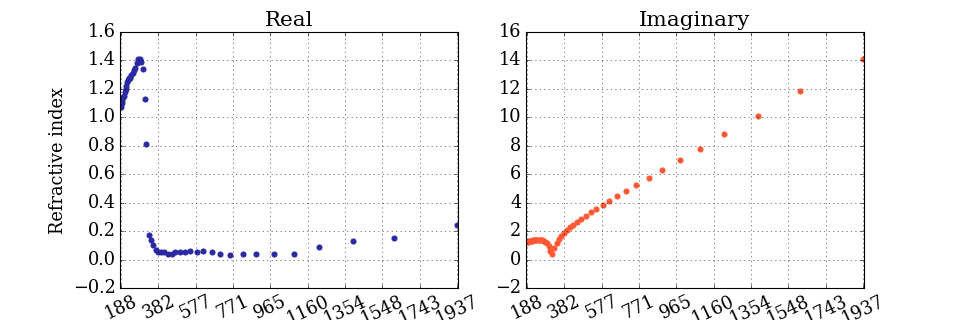

In [4]:
plot_refrac(lambda_s, n_s, k_s)

In [5]:
from scipy.interpolate import interp1d, splev, splrep

In [6]:
def linear_interp(lamb, n, k):
    '''Returns the linear interpolation of the real and imaginary refractive index.
    
    Arguments:
    ----------
    lamb: array, wavelengths.
    n   : array, real part of refractive index. 
    k   : array, imaginary part of refractive index.
    
    Returns:
    --------
    real_inter: function, interpolated function of the real part of the refrac index.
    imag_inter: function, interpolated function of the imaginary part the refrac index.
    
    '''
    real_inter = interp1d(lamb, n)
    imag_inter = interp1d(lamb, k)
    
    return real_inter, imag_inter

In [7]:
def spline(lamb, n, k):
    '''Returns the B-spline representations of the real and imaginary refractive index.
    
    Arguments:
    ----------
    lamb: array, wavelengths.
    n   : array, real part of refractive index. 
    k   : array, imaginary part of refractive index.
    
    Returns:
    --------
    real_tuple: tuple, vector of knots, spline coefficients, and the degree of the spline
                of the real part of the refrac index.
    imag_tuple: tuple, vector of knots, spline coefficients, and the degree of the spline
                of the imaginary part of the refrac index.
    '''
    
    real_tuple = splrep(lamb, n)
    imag_tuple = splrep(lamb, k)
    
    return real_tuple, imag_tuple

In [8]:
def spline_eval(x, real_tuple, imag_tuple): 
    '''Evaluates the B-splines of the real and imaginary refractive index.
    
    Arguments:
    ----------
    x         : array,  points at which to return the value of the spline
    real_tuple: tuple, vector of knots, spline coefficients, and the degree of the spline
                of the real part of the refrac index.
    imag_tuple: tuple, vector of knots, spline coefficients, and the degree of the spline
                of the imaginary part of the refrac index.
    
    
    Returns:
    --------    
    real_spline: array, values representing the spline function evaluated at the points in
                 x for real refractive index.
    imag_spline: array, values representing the spline function evaluated at the points in
                 x for real refractive index.    
    '''
    
    real_spline = splev(x, real_tuple)
    imag_spline = splev(x, imag_tuple)
    
    return real_spline, imag_spline
    

In [9]:
#linear interpolation
silver_real_linear , silver_imag_linear = linear_interp(lambda_s, n_s, k_s)

#get spline 
silver_real_tuple, silver_imag_tuple = spline(lambda_s, n_s, k_s)

#spline evaluation
lambda_x = numpy.linspace(min(lambda_s), max(lambda_s), num=500, endpoint=True)
silver_real_spline, silver_imag_spline = spline_eval(lambda_x, silver_real_tuple, silver_imag_tuple)

In [ ]:
def plot_interpolation(lamb, n, k, lamb_x, real_linear, imag_linear, real_spline, imag_spline)